<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

##**Збіжність метода Нелдера-Міда при мінімізації кореневої функції**
###Виконав: студент групи КМ-81 Скринський В'ячеслав
###Керівник: Норкін Боган Володимирович, доктор фізикоматематичних наук

#Опис проблеми

Метод  Нелдер-Міда є популярним чисельним методом, що використовується для пошуку мінімуму або максимуму цільової функції в багатовимірному просторі. У методі використовується поняття *симлексу*, який є спеціальним політопом n+1 вершин в n вимірах.


На початку методу вибирається n+1 точка, яка утворює початковий симплекс простору. У цих точках вираховуємо значення функції. Далі, спеціальним чином обираються 3 точки і знаходиться центр ваги симплексу. За допомогою операцій стиснення, вдображення та розширення порівнюємо значення функції у потрібних точках та обираємо новий, більш оптимальний симплекс. Продовжуємо роботу алгоритму, допоки не відшукаємо оптимальну за нашими критеріями точку.

У даній роботі, ми будемо вивчати більш не саму реалізацію методу, а розглянемо сам процес мінімізації функції методом Нелдера-Міда (на прикладі кореневої функції). Також будемо порівнювати роботу методу з іншими відомими методами, але вже не нульовго порядку (щоб зрозуміти, які методи і де доречніше використовувати).



# Підготовка до вирішення проблеми

## Імпорт бібліотек та допоміжних функцій

1.   numpy
2.   numpy.linalg.norm
3.   math
4.   matplotlib.pyplot
5.   mpl_toolkits.mplot3d.Asex3D
6.   matplotlib.cm
7.   scipy.optimize
8.   time

In [28]:
import numpy as np
import math
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
import time

## Основні функції

Коренева функція: $~~z = (10(x - y)^{2} + (x-1)^2)^{1/4}$.

In [29]:
def root_func(x, y):
  return pow(10 * (x - y)**2 + (x - 1)**2, 1/4)

x_arr = np.arange(-1.5, 2.5, 0.01)
y_arr = np.arange(-2, 3, 0.01)
root_func_arr = np.array([[root_func(x, y) for x in x_arr] for y in y_arr])

Частинні похідні кореневої функції

In [30]:
def dRootdx(x, y):
  return 1/4 * pow((10 * (x - y)**2 + (x - 1)**2), -3/4) * (20 * (x - y) + 2 * (x - 1))


def dRootdy(x, y):
  return 1/4 * pow((10 * (x - y)**2 + (x - 1)**2), -3/4) * (- 20 * (x - y))

Побудова графіка кореневої функції.

https://matplotlib.org/

https://mipt-stats.gitlab.io/courses/python/06_matplotlib.html

http://www.100byte.ru/python/nm/nm.html#p5

In [31]:
def root_func_graph1():
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  surf = ax.plot_surface(x, y, root_func_arr, cmap = cm.Spectral, linewidth = 0, antialiased = False)
  
  fig.colorbar(surf, shrink = 0.5, aspect = 5)

  plt.show()

In [32]:
def root_func_graph2():
  x = np.linspace(-1.5, 2.5, 100)
  y = np.linspace(-2., 3., 100)
  X, Y = np.meshgrid(x,y)
  Z = root_func(X, Y)

  fig = plt.figure(0)
  plt.clf()
  plt.contourf(X, Y, Z, 20)
  plt.colorbar()
  plt.contour(X, Y, Z, 20, colors = "black")
  plt.grid()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

In [33]:
def root_func_graph3():
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, root_func_arr)

  plt.show()

Фукнція **nelder_mid_opt** реалізує метод Нелдера-Міда за допомогою scipy.optimize на прикладі кореневої функції. 

---
Параметри функції: (x_init, y_init) - початкова точка, eps - точність пошуку екстремума.

In [34]:
def nelder_mid_opt(x_init, y_init, eps):
  def root_func1(point):
    return root_func(point[0], point[1])
    
  return opt.minimize(root_func1, (x_init, y_init), method='Nelder-Mead', options={'xtol': eps, 'disp': True}).x

Функція **nelder_mid_opt_visual** візуалізує пошук мінімуму кореневої функції за допомогою функції nelder_mid_opt.

In [35]:
def nelder_mid_opt_visual(x_init, y_init, eps):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, root_func_arr, color='y', alpha=0.5)

  # відображення початкової точки
  ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init - 1.1, y_init + .06, root_func(x_init, y_init) + .25, 'Початкова точка', fontsize=12)

  # відображення отриманої точки
  x_min, y_min = nelder_mid_opt(x_init, y_init, eps)
  ax.scatter(x_min, y_min, root_func(x_min, y_min), c='blue', s=30)
  ax.text(x_min + .1, y_min + .1, root_func(x_min, y_min) + .06, 'Отримана точка', fontsize=12)

  plt.show()

Функція **init_simplex** реалізує формування початкового симплексу (необхідна для подальшої альтернативної реалізації методу Нелдера-Міда)

---

Параметри: (x_init, y_init) - початкова точка, L - довжина ребра початкового симплексу.

In [36]:
def init_simplex(X, L, n, initialSimplex):
  qn = math.sqrt(1.0 + n) - 1.0
  q2 = L / math.sqrt(2.0) * n
  r1 = q2 * (qn + n)
  r2 = q2 * qn
  initialSimplex[0, :] = X
  for j in range(n):
      initialSimplex[j + 1, :] = X + r2
  for i in range(n):
      initialSimplex[i + 1, i] += (r1 - r2)

Функція **nelder_mid_opt_alt** є альтернативна реалізація методу Нелдера-Міда на прикладі кореневої функції із застосуванням scipy.optimize та процедурою формування початкового симплексу.

---

Параметри: (x_init, y_init) - початкова точка, L - довжина ребра початкового сімплекса, eps - точність розрахунку.

In [37]:
def nelder_mid_opt_alt(x_init, y_init, L, eps):
  def root_func1(point):
    return root_func(point[0], point[1])
  n = 2
  X = np.zeros(2, dtype=float)
  X[0], X[1] = x_init, y_init
  initialSimplex = np.zeros((n + 1, n), dtype=float)
  init_simplex(X, L, n, initialSimplex)

  return opt.minimize(root_func1, X, method='Nelder-Mead', options = {'xtol': eps, 'disp': True, 'initial_simplex': initialSimplex}).x

Функція **nelder_mid_opt_alt_visual** візуалізує пошук мінімуму кореневої функції за допомогою функції nelder_mid_opt_alt .

In [38]:
def nelder_mid_opt_alt_visual(x_init, y_init, L, eps):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, root_func_arr, color='y', alpha=0.5)

  # відображення початкової точки
  ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init - 1.1, y_init + .06, root_func(x_init, y_init) + .25, 'Початкова точка', fontsize=12)

  # відображення отриманої точки
  x_min, y_min = nelder_mid_opt_alt(x_init, y_init, L, eps)
  ax.scatter(x_min, y_min, root_func(x_min, y_min), c='blue', s=30)
  ax.text(x_min + .1, y_min + .1, root_func(x_min, y_min) + .06, 'Отримана точка', fontsize=12)

  plt.show()

Допоміжний клас **Vector** .

In [39]:
class Vector(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return "({0}, {1})".format(self.x, self.y)

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        return Vector(x, y)

    def __rmul__(self, other):
        x = self.x * other
        y = self.y * other
        return Vector(x, y)

    def __truediv__(self, other):
        x = self.x / other
        y = self.y / other
        return Vector(x, y)

    def c(self):
        return (self.x, self.y)

Допоміжна функція **draw_triangle** для подальшої візуалізації метода Нелдера-Міда.

---

Параметри: f - функція, до якої буде застосований метод Нелдера-Міда; v1, v2, v3 - вершини симплекса; i - номер ітерації.

In [40]:
def draw_triangle(f, v1, v2, v3):
  x = np.linspace(-0.1, 1.2, 100)
  y = np.linspace(-0.1, 1.2, 100)
  X, Y = np.meshgrid(x,y)
  Z = f((X, Y))

  fig = plt.figure()
  plt.clf()
  plt.contourf(X, Y, Z, 10, alpha=0.7)
  plt.colorbar()
  plt.contour(X, Y, Z, 10, colors = "black")
  plt.grid()
  plt.xlabel("x")
  plt.ylabel("y")

  plt.plot([v1.x, v2.x], [v1.y, v2.y], color='red', linewidth=1.8)
  plt.plot([v1.x, v3.x], [v1.y, v3.y], color='red', linewidth=1.8)
  plt.plot([v2.x, v3.x], [v2.y, v3.y], color='red', linewidth=1.8)

Функція **nelder_mead_visual** реалізує метод Нелдера-Міда та його візуалізацію.

---

Параметри: f - функція, яку потрібно мінімізувати, p1, p2, p3 - вершини початкового симплексу, eps - точність розрахунку.

Критерій закінчення: $~f(x^{(k)}) \leq \varepsilon$.

In [41]:
def nelder_mead_visual(f, p1, p2, p3, eps, alpha=1, beta=0.5, gamma=2):
    v1 = Vector(*p1)
    v2 = Vector(*p2)
    v3 = Vector(*p3)

    adict = {v1:f(v1.c()), v2:f(v2.c()), v3:f(v3.c())}
    points = sorted(adict.items(), key=lambda x: x[1])
        
    b = points[0][0]
    g = points[1][0]
    w = points[2][0]

    count = 0
    draw_triangle(f, v1, v2, v3)
    plt.scatter(b.x, b.y, color='red', s=40)    

    while root_func(b.x, b.y) > eps:
        count += 1

        adict = {v1:f(v1.c()), v2:f(v2.c()), v3:f(v3.c())}
        points = sorted(adict.items(), key=lambda x: x[1])
        
        b = points[0][0]
        g = points[1][0]
        w = points[2][0]
        
        
        mid = (g + b)/2

        # reflection
        xr = mid + alpha * (mid - w)
        if f(xr.c()) < f(g.c()):
            w = xr
        else:
            if f(xr.c()) < f(w.c()):
                w = xr
            c = (w + mid)/2
            if f(c.c()) < f(w.c()):
                w = c
        if f(xr.c()) < f(b.c()):

            # expansion
            xe = mid + gamma * (xr - mid)
            if f(xe.c()) < f(xr.c()):
                w = xe
            else:
                w = xr
        if f(xr.c()) > f(g.c()):
            
            # contraction
            xc = mid + beta * (w - mid)
            if f(xc.c()) < f(w.c()):
                w = xc

        # update points
        v1 = w
        v2 = g
        v3 = b

        draw_triangle(f, v1, v2, v3)

        plt.scatter(b.x, b.y, color='red', s=40)
    
    print('Кількість ітерацій: %d' %count)
    
    return b

Метод золотого перетину.

http://dit.isuct.ru/IVT/sitanov/Literatura/M171/Pages/Glava1_3.htm

In [42]:
def gold_ratio(f, a, b, eps):
  if a > b:
    a, b = b, a

  x1 = a + 0.382 * (b - a)
  x2 = b - 0.382 * (b - a)
  A = f(x1)
  B = f(x2)
  
  while b - a > eps:
    if A < B:
      b = x2
      if b - a < eps:
        break

      x2 = x1
      B = A
      x1 = a + 0.382 * (b - a)
      A = f(x1)
    else:
      a = x1
      if b - a < eps:
        break

      x1 = x2
      A = B
      x2 = b - 0.382 * (b - a)
      B = f(x2)

  return (a + b) / 2

In [43]:
def descent_optim_N(N, lmd, x_init, y_init, eps_lmd):
  x = np.linspace(-0.1, 1.2, 100)
  y = np.linspace(-0.1, 1.2, 100)
  X, Y = np.meshgrid(x,y)
  Z = f((X, Y))

  fig = plt.figure()
  plt.clf()
  plt.contourf(X, Y, Z, 10, alpha=0.7)
  plt.colorbar()
  plt.contour(X, Y, Z, 10, colors = "black")
  plt.grid()
  plt.xlabel("x")
  plt.ylabel("y")

  a = 0
  b = 2 * lmd
  
  count = 0
  
  plt.scatter(x_init, y_init, c='red', s=30)

  for i in range(N):
    count += 1
    plt.scatter(x_init, y_init, c='red', s=10)

    def f1(lmd):
      return root_func(x_init - lmd * dRootdx(x_init, y_init), y_init - lmd * dRootdy(x_init, y_init))
    
    lmd = gold_ratio(f1, a, b, eps_lmd)

    x_init = x_init - lmd * dRootdx(x_init, y_init)
    y_init = y_init - lmd * dRootdy(x_init, y_init)

  plt.scatter(x_init, y_init, c='red', s=30)
  
  plt.show()
  
  print('\nОтримана точка: (%.5f, %.5f)' % (x_init, y_init))

Функція **descent_optim1** реалізує метод найскорішого спуску з оптимальним кроком на прикладі кореневої функції.

http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0

---
Параметри функції: lmd - початковий крок, (x_init, y_init) - початкова точка, eps - точність розрахунку, eps_lmd - точність одновимірного пошуку (метод золотого перетину), t - обмеження виконання по часу.

Критерій закінчення: $||\nabla f(x^{(k)})|| \leq \varepsilon$.


In [44]:
def descent_optim1(lmd, x_init, y_init, eps, eps_lmd, t):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, root_func_arr, color='yellow', alpha=0.5)

  a = 0
  b = 2 * lmd

  count = 0
  start = time.time()

  grad_norm = norm([dRootdx(x_init, y_init), dRootdy(x_init, y_init)])
  
  ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init + .08, y_init + .06, root_func(x_init, y_init) + .1, 'Початкова точка', fontsize=12)

  while grad_norm > eps:
    count += 1
    ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=2)

    def f1(lmd):
      return root_func(x_init - lmd * dRootdx(x_init, y_init), y_init - lmd * dRootdy(x_init, y_init))
    
    lmd = gold_ratio(f1, a, b, eps_lmd)

    x_init = x_init - lmd * dRootdx(x_init, y_init)
    y_init = y_init - lmd * dRootdy(x_init, y_init)

    grad_norm = norm([dRootdx(x_init, y_init), dRootdy(x_init, y_init)])    

    if time.time() - start > t:      
      break

  ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init + .1, y_init + .1, root_func(x_init, y_init) + .06, 'Отримана точка', fontsize=12)
  
  plt.show()
  
  print('\nОтримана точка: (%.5f, %.5f)' % (x_init, y_init))
  print('Кількість ітерацій: %d' %count)
  print(r'Норма градієнта: %.2f' %grad_norm)

Функція **descent_optim2** реалізує метод найскорішого спуску з оптимальним кроком на прикладі кореневої функції.

---
Параметри функції: lmd - початковий крок, (x_init, y_init) - початкова точка, eps - точність розрахунку, eps_lmd - точність одновимірного пошуку (метод золотого перетину).

Критерій закінчення: $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases}$.


In [45]:
def descent_optim2(lmd, x_init, y_init, eps, eps_lmd):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(15, -115)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, root_func_arr, color='yellow', alpha=0.5)

  a = 0
  b = 2 * lmd

  count = 0
  start = time.time()

  x_delta = norm([lmd * dRootdx(x_init, y_init), lmd * dRootdy(x_init, y_init)]) / norm([x_init, y_init])
  f_delta = abs(root_func(x_init - lmd * dRootdx(x_init, y_init), y_init - lmd * dRootdy(x_init, y_init)) - root_func(x_init, y_init))
  
  ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init - 1.1, y_init + .06, root_func(x_init, y_init) + .25, 'Початкова точка', fontsize=12)

  while x_delta > eps or f_delta > eps:
    count += 1
    ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=2)

    def f1(lmd):
      return root_func(x_init - lmd * dRootdx(x_init, y_init), y_init - lmd * dRootdy(x_init, y_init))
    
    lmd = gold_ratio(f1, a, b, eps_lmd)

    x_init = x_init - lmd * dRootdx(x_init, y_init)
    y_init = y_init - lmd * dRootdy(x_init, y_init)

    x_delta = norm([lmd * dRootdx(x_init, y_init), lmd * dRootdy(x_init, y_init)]) / norm([x_init, y_init])
    f_delta = abs(root_func(x_init - lmd * dRootdx(x_init, y_init), y_init - lmd * dRootdy(x_init, y_init)) - root_func(x_init, y_init)) 

  ax.scatter(x_init, y_init, root_func(x_init, y_init), c='blue', s=30)
  ax.text(x_init + .1, y_init + .1, root_func(x_init, y_init) + .06, 'Отримана точка', fontsize=12)
  
  plt.show()
  
  print('\nОтримана точка: (%.5f, %.5f)' % (x_init, y_init))
  print('Кількість ітерацій: %d' %count)

# Вирішення проблеми

##Ознайомлення з кореневою функцією

Побудуємо графік кореневої функції. Неважко перевірити (аналітично), що точкою глобального мінімуму кореневої функції є точка (1, 1), в якій вона набуває значення 0.

Графік 1
Графік кореневої функції


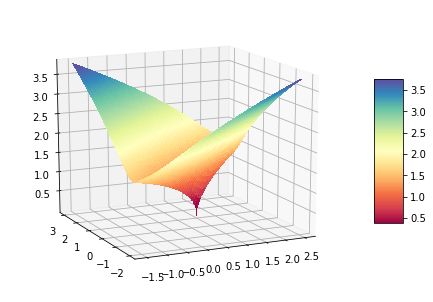

In [46]:
print('Графік 1\nГрафік кореневої функції')
root_func_graph1()

Графік 2
Графік кореневої функції (2-х вимірний)


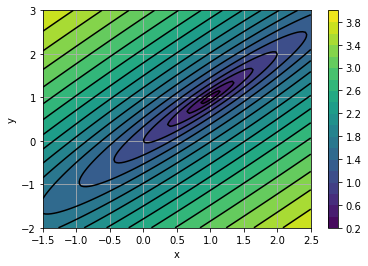

In [47]:
print('Графік 2\nГрафік кореневої функції (2-х вимірний)')
root_func_graph2()

Для більш зручної візуалізації надалі будемо використовувати "монотонний" варіант графіка 1:

Графік 3
Графік кореневої функції (монотонний)


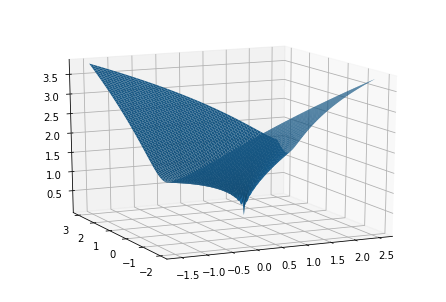

In [48]:
print('Графік 3\nГрафік кореневої функції (монотонний)')
root_func_graph3()

##Мінімізація кореневої функції

Для мінімізації кореневої функції застосуємо метод Нелдера-Міда.

---

**Параметри:** початкова точка (-1.5, -2), точність розрахунку eps = 1.0e-5.

Графік 4
Оптимізована функція
Optimization terminated successfully.
         Current function value: 0.000302
         Iterations: 75
         Function evaluations: 139


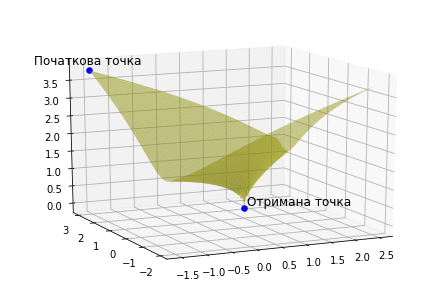

In [49]:
print('Графік 4\nОптимізована функція')

x_init = -1.5
y_init = 3
eps = 1.0e-5
nelder_mid_opt_visual(x_init, y_init, eps)

Розглянемо також альтернативну реалізацію метода Нелдера-Міда з використанням scipy.optimize та процедурою формування початкового симплексу.

---

**Параметри:** початкова точка (-1.5, 3), довжина ребра початкового симплексу L = 0.4, точність розрахунку eps = 1.0e-5 .

Графік 5
Оптимізована функція (з початковим симплексом)
Optimization terminated successfully.
         Current function value: 0.000227
         Iterations: 60
         Function evaluations: 117


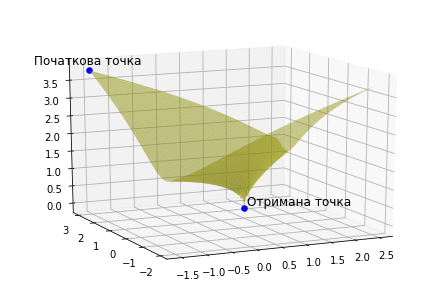

In [50]:
print('Графік 5\nОптимізована функція (з початковим симплексом)')

x_init = -1.5
y_init = 3
L = .4
eps = 1.0e-5
nelder_mid_opt_alt_visual(x_init, y_init, L, eps)

Поітераційна візуалізація роботи Нелдера-Міда

---
Параметри: вершини початкового симплексу p1 = (0, 0), p2 = (1, 0), p3 = (0, 1), точність розрахунку eps = 0.2 .

Критерій закінчення: $~f(x^{(k)}) \leq \varepsilon$.


Графік 6
Поітераційна візуалізація методу
Кількість ітерацій: 12
Отримана точка: (1.0378684997558594, 1.0387954711914062)


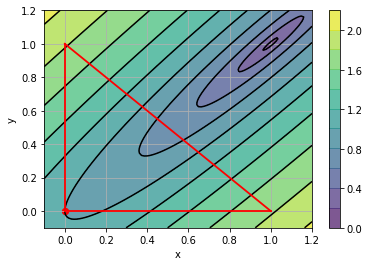

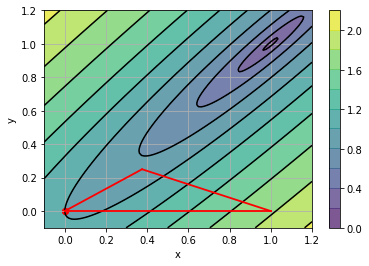

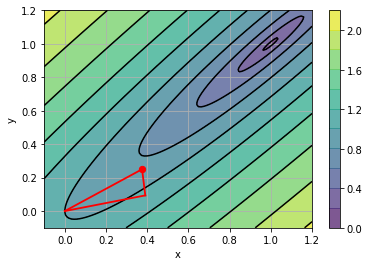

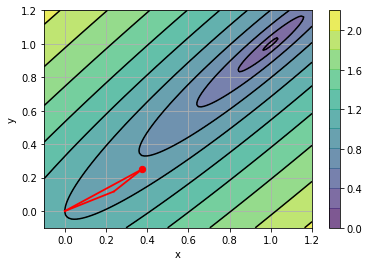

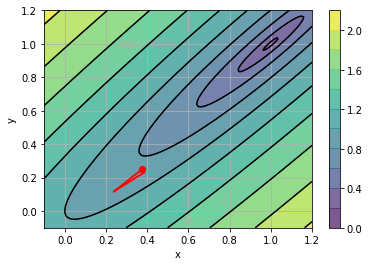

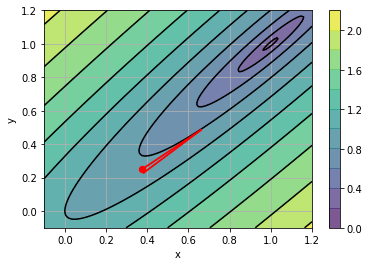

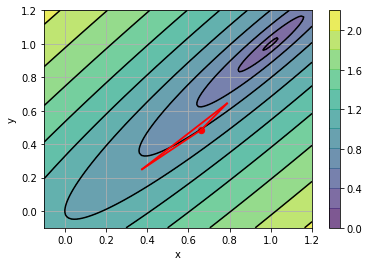

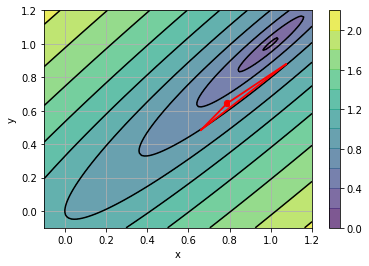

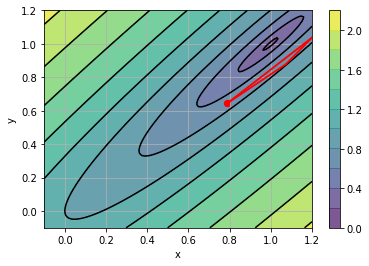

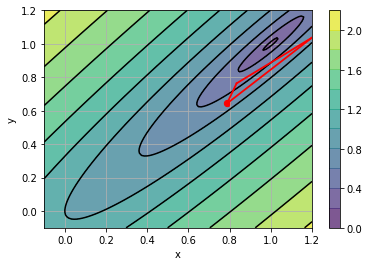

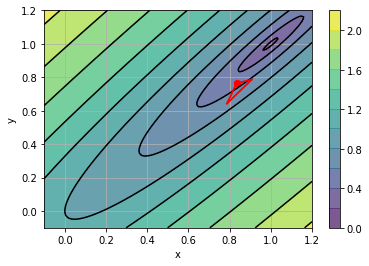

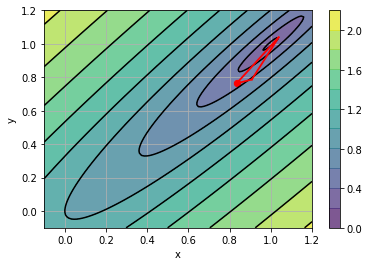

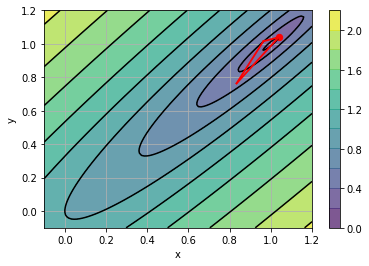

In [51]:
print('Графік 6\nПоітераційна візуалізація методу')

def root_func1(point):
  return root_func(point[0], point[1])

f = root_func1
p1 = (0, 0)
p2 = (1, 0)
p3 = (0, 1)
eps = .2

xk = nelder_mead_visual(root_func1, p1, p2, p3, eps)
print("Отримана точка: %s"%(xk))

##Порівняння з МНС

Для порівняння ефективності розглянемо також результат перших 12 ітерацій методу найскорішого спуску з оптимальним кроком.

Графік 7
Ітерації методу насйкорішого спуску


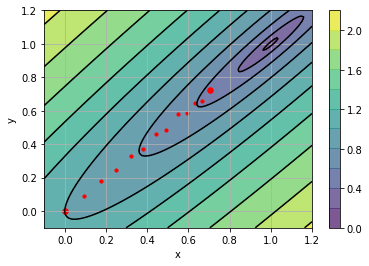


Отримана точка: (0.70396, 0.72308)


In [52]:
print('Графік 7\nІтерації методу насйкорішого спуску')
descent_optim_N(12, 1, 0, 0, 0.0001)

Розглянемо також результати цього методу для різних критеріїв закінчення.

Критерій закінчення $||\nabla f(x^{(k)})|| \leq \varepsilon$.

---
**Параметри:** крок lmd = 0.01, початкова точка (-1.5, 3), точність розрахунку eps = 0.001, точність одновимірного пошуку (метод золотого перетину) eps_lmd = 0.0001.

**Зауваження 1:** якщо протягом 15 секунд функція не досягає критерію закінчення, вона перериває своє виконання, виводить поточне значення $||\nabla f(x^{(k)})||$ та отриману точку. 

**Зауваження 2:** наведене обмеження за часом є обмеженням саме на пошук мінімуму (тобто виконання циклу while); загальний час виконання функції (пошук мінімуму та візуалізація результату) може істотно перевищувати вказане обмеження. 

In [ ]:
print('Графік 8\nМНС з критерієм по нормі градієнту')

start = time.time()
descent_optim1(0.01, -1.5, 3, 0.001, 0.0001, 15)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Графік 8
МНС з критерієм по нормі градієнту


Змінимо критерій закінчення на $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    |f(x_{k})-f(x_{k-1})| \leq \varepsilon\\
 \end{cases}$ та початкову точку на (2.5, -2). 

In [ ]:
print('Графік 9\nМНС з критірями по різницях')

start = time.time()
descent_optim2(0.01, 2.5, -2, 0.001, 0.00001)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

# Висновки


Зображена на графіках 1-3 коренева функція задається рівнянням $~z = (10(x - y)^{2} + (x-1)^2)^{1/4}$ . Її глобальний мінімум -   точка (1, 1), в якій вона набуває значення 0. Наведена функція є одним з прикладів функцій, для яких мінімізація градієнтними та симплекс-методами є нетривіальною задачею (ще один широко відомий приклад подібної функції - функція Розенброка).

На графіках 4, 5 бачимо, що застосування до кореневої функції методу Нелдера-Міда дає доволі точні результати за відносно невелику кількість ітерацій. Так, порівнюючи із застосуванням методу найскорішого спуску з оптимальним кроком (графіки 8, 9), незалежно від вибору критерію закінчення бачимо абсолютну перевагу реалізацій метода Нелдера-Міда з використанням scipy.optimize.

Істотню перевагу в ефективності застосування також можно побачити, порівнюючи поітераційну серію графіків роботи метода Нелдера-Міда на 6 і 7 графіках. Бачимо, що за однакову кількість ітерацій метод Нелдера-Міда дає значно точніший результат у порівнянні з градієнтним методом.

Також варто зауважити, що на ефективність застосування симплекс-методу, зокрема, методу Нелдера-Міда, істотньо залежить від вибору початкового симплексу. Це можна побачити порівнюючи графік 4 та графік 5. У випадку наявності процедури знаходження оптимального початкового симплексу (допоміжна функція init_simplex), подальше застосування функції scipy.optimize є більш ефективним.